In [ ]:
import random
import math

# Define the parameters of the ACO algorithm.
NUM_ANTS = 100
NUM_ITERATIONS = 100
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
NUM_PAGES = 10

# Create the pheromone matrix.
pheromones = [[0.0 for _ in range(NUM_PAGES)] for _ in range(NUM_PAGES)]

# Create the heuristic matrix.
heuristics = [[0.0 for _ in range(NUM_PAGES)] for _ in range(NUM_PAGES)]

# Create the list of candidate web pages.
candidates = [i for i in range(NUM_PAGES)]

# Initialize the ants.
ants = []
for _ in range(NUM_ANTS):
    ant = {
        "position": random.choice(candidates),
        "path": [random.choice(candidates)],
        "fitness": 0.0
    }
    ants.append(ant)

# Run the ACO algorithm.
for _ in range(NUM_ITERATIONS):
    # Update the pheromone matrix.
    for i in range(NUM_PAGES):
        for j in range(NUM_PAGES):
            pheromones[i][j] *= (1.0 - RHO)

    # Update the heuristic matrix.
    for i in range(NUM_PAGES):
        for j in range(NUM_PAGES):
            if i != j:
                # Calculate Euclidean distance between pages i and j
                dist = math.sqrt((i - j) ** 2)
                heuristics[i][j] = 1.0 / dist if dist != 0 else 0  # Avoid division by zero

    # Move the ants.
    for ant in ants:
        # Choose the next web page to visit.
        next_page = random.choice(candidates)
        for j in range(NUM_PAGES):
            if j != ant["position"] and heuristics[ant["position"]][j] > heuristics[ant["position"]][next_page]:
                next_page = j

        # Update the ant's position and path.
        ant["position"] = next_page
        ant["path"].append(ant["position"])

        # Update the ant's fitness.
        ant["fitness"] += 1.0 / len(ant["path"])

# Print the final paths and fitness values of ants
for i, ant in enumerate(ants):
    print(f"Ant {i + 1} - Path: {ant['path']}, Fitness: {ant['fitness']}")

# Additionally, you can print the pheromone matrix and heuristic matrix
print("\nPheromone Matrix:")
for row in pheromones:
    print(row)

print("\nHeuristic Matrix:")
for row in heuristics:
    print(row)



Ant 1 - Path: [6, 7, 6, 5, 4, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], Fitness: 4.19727850773863
Ant 2 - Path: [1, 6, 5, 4, 5, 4, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1], Fitness: 4.19727850773863
Ant 3 - Path: [0, 3, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0

In [ ]:
import os
from bs4 import BeautifulSoup
import chardet
import random
import math

# Initialize data structures to store information
pages_information = {}
words_information = {}

# Define a function to preprocess text
def preprocess_text(text):
    # Your text preprocessing logic here
    # Make sure this function returns a list of valid tokens

    # For example, you can split the text into words
    words = text.split()

    # Filter and preprocess each word
    valid_tokens = []
    for word in words:
        # Apply your filtering and preprocessing rules here
        # For example, you can remove punctuation and convert to lowercase
        processed_word = word.strip('.,!?').lower()

        # Check if the processed word is not empty
        if processed_word:
            valid_tokens.append(processed_word)

    return valid_tokens

def query_search(query, pages_information, words_information):
    # Get the list of all words in the query
    query_words = query.split()

    # Create a dictionary to store the relevance scores of each page
    relevance_scores = {}

    # Iterate over all pages
    for page_id, page_info in pages_information.items():
        # Calculate the relevance score of the page
        relevance_score = 0
        for query_word in query_words:
            if query_word in words_information:
                # Get the list of pages that contain the query word
                pages_with_query_word = words_information[query_word]['pages_list']

                # If the page is one of the pages that contain the query word, add 1 to the relevance score
                if page_id in pages_with_query_word:
                    relevance_score += 1

        # Add the relevance score to the dictionary
        relevance_scores[page_id] = relevance_score

    # Sort the dictionary by relevance score in descending order
    sorted_relevance_scores = sorted(relevance_scores.items(), key=lambda x: x[1], reverse=True)

    # Return the list of ranked documents
    return sorted_relevance_scores

# Define the parameters of the ACO algorithm.
NUM_ANTS = 100
NUM_ITERATIONS = 100
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
NUM_PAGES = 10

# Create the pheromone matrix.
pheromones = [[0.0 for _ in range(NUM_PAGES)] for _ in range(NUM_PAGES)]

# Create the heuristic matrix.
heuristics = [[0.0 for _ in range(NUM_PAGES)] for _ in range(NUM_PAGES)]

# Create the list of candidate web pages.
candidates = [i for i in range(NUM_PAGES)]

# Initialize the ants.
ants = []
for _ in range(NUM_ANTS):
    ant = {
        "position": random.choice(candidates),
        "path": [random.choice(candidates)],
        "fitness": 0.0
    }
    ants.append(ant)

# Path to the directory containing your HTML documents
data_path = "/content/drive/MyDrive/Major_Project/Project_code/webkb-data/webkb/course"

# Process each document in the dataset
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".html"):
            html_file_path = os.path.join(root, file)

            # Detect the encoding of the file
            with open(html_file_path, 'rb') as file:
                encoding = chardet.detect(file.read())['encoding']

            # Read the HTML content using the detected encoding
            with open(html_file_path, 'r', encoding=encoding) as file:
                html_content = file.read()
                soup = BeautifulSoup(html_content, 'html.parser')

                # Extract information from the document
                # Extract the filename (without extension) from the file path as the document ID
                document_id = os.path.splitext(os.path.basename(html_file_path))[0]

                page_title_tag = soup.title
                if page_title_tag and page_title_tag.string:
                    page_name = page_title_tag.string.strip()  # Extract page name
                else:
                    page_name = "N/A"  # Assign a default value if no title tag or title text is found

                # Tokenize and preprocess the content
                text_content = soup.get_text()
                valid_tokens = preprocess_text(text_content)

                # Update pages-information table
                pages_information[document_id] = {
                    'id': document_id,
                    'pagename': page_name,
                    'content': text_content  # Store the entire content for later use
                }

                # Update words-information table
                for token in valid_tokens:
                    if token in words_information:
                        words_information[token]['word'] = token
                        words_information[token]['pages_list'].add(document_id)

# Run the ACO algorithm.
for _ in range(NUM_ITERATIONS):
    # Update the pheromone matrix.
    for i in range(NUM_PAGES):
        for j in range(NUM_PAGES):
            pheromones[i][j] *= (1.0 - RHO)

    # Update the heuristic matrix.
    for i in range(NUM_PAGES):
        for j in range(NUM_PAGES):
            if i != j:
                # Calculate Euclidean distance between pages i and j
                dist = math.sqrt((i - j) ** 2)
                heuristics[i][j] = 1.0 / dist if dist != 0 else 0  # Avoid division by zero

    # Move the ants.
    for ant in ants:
        # Choose the next web page to visit.
        next_page = random.choice(candidates)
        for j in range(NUM_PAGES):
            if j != ant["position"] and heuristics[ant["position"]][j] > heuristics[ant["position"]][next_page]:
                next_page = j

        # Update the ant's position and path.
        ant["position"] = next_page
        ant["path"].append(ant["position"])

        # Update the ant's fitness.
        ant["fitness"] += 1.0 / len(ant["path"])

# Print the final paths and fitness values of ants
for i, ant in enumerate(ants):
    print(f"Ant {i + 1} - Path: {ant['path']}, Fitness: {ant['fitness']}")

# Additionally, you can print the processed information about pages and words
print("\nPages Information:")
for page_id, page_info in pages_information.items():
    print(page_info)

print("\nWords Information:")
for word_info in words_information.values():
    print(word_info)

# Define a simple search query
search_query = "CSI"

# Use the query_search function to retrieve ranked documents based on the search query
search_results = query_search(search_query, pages_information, words_information)

# Print the search results
print("\nSearch Results:")
for result in search_results:
    print(f"Page: {result[0]}, Relevance Score: {result[1]}")


Ant 1 - Path: [8, 5, 4, 3, 2, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0], Fitness: 4.19727850773863
Ant 2 - Path: [2, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1], Fitness: 4.19727850773863
Ant 3 - Path: [8, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0

In [ ]:
import random
import math

# Define the parameters of the ACO-based feature selection algorithm
NUM_ANTS = 100
NUM_ITERATIONS = 10  # Adjust the number of iterations as needed
ALPHA = 1.0
BETA = 2.0
RHO = 0.5
NUM_FEATURES = 100  # Adjust the number of original features as needed

# Feature initialization
pheromones = [1.0 for _ in range(NUM_FEATURES)]  # Pheromones associated with each feature
intensity = [1.0 for _ in range(NUM_FEATURES)]  # Intensity of pheromone trial associated with each feature

# Classifier evaluation function (replace this with your actual classifier evaluation)
def evaluate_classifier(feature_subset):
    # Placeholder function, replace with your actual classifier and evaluation logic
    return random.uniform(0, 1)

# Main ACO-based feature selection algorithm
for iteration in range(NUM_ITERATIONS):
    # 1. Solution generation and evaluation of ants
    ants = [{"features": random.sample(range(NUM_FEATURES), k=random.randint(1, NUM_FEATURES)), "mse": float('inf')}
            for _ in range(NUM_ANTS)]

    for ant in ants:
        for _ in range(10):  # 10 successive steps
            # Classifier evaluation
            mse = evaluate_classifier(ant["features"])

            # Check if the MSE is decreasing
            if mse < ant["mse"]:
                ant["mse"] = mse
            else:
                break  # Exit if not able to decrease MSE in 10 successive steps

    # 3. Evaluation of the selected subsets
    ants.sort(key=lambda x: (x["mse"], len(x["features"])))
    best_subset = ants[0]["features"]

    # 4. Check the stop criterion
    if iteration >= NUM_ITERATIONS - 1:
        break

    # 5. Pheromone updating
    for i in range(NUM_FEATURES):
        pheromones[i] *= (1.0 - RHO)  # Decrease pheromone concentrations

    # Deposit pheromone on the best ant's features
    for feature in best_subset:
        pheromones[feature] += intensity[feature]

    # 6. Generation of new ants
    ants = []

# Output the final selected feature subset
print("Best Feature Subset:", best_subset)


Best Feature Subset: [16, 64, 44, 47, 32, 31, 70, 23, 60, 68, 4, 11, 26]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from bs4 import BeautifulSoup
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

def read_html_documents(directory_path):
    documents = []
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                content = file.read()
                # Parse the HTML content
                soup = BeautifulSoup(content, 'html.parser')
                # Extract information from the HTML document, e.g., title and text content
                title = soup.title.string if soup.title else "No Title"
                text = soup.get_text()
                # Store the information in a structured format, e.g., a dictionary
                document_info = {
                    'file_path': file_path,
                    'title': title,
                    'text_content': text
                }
                documents.append(document_info)
    return documents

def extract_tags(content):
    # Define regular expressions to match the tags
    title_pattern = re.compile(r'<title>(.*?)</title>')
    header_pattern = re.compile(r'<h[1-3]>(.*?)</h[1-3]>')
    anchor_pattern = re.compile(r'<a(.*?)>(.*?)</a>')
    italic_pattern = re.compile(r'<i>(.*?)</i>')
    bold_pattern = re.compile(r'<b>(.*?)</b>')

    # Initialize a list to store the tags found in the content
    tags = []

    # Extract title tag
    title_match = title_pattern.search(content)
    if title_match:
        tags.append('title')

    # Extract header and sub-header tags (h1, h2, h3)
    header_matches = header_pattern.findall(content)
    tags.extend(['header' for _ in header_matches])

    # Extract anchor tags
    anchor_matches = anchor_pattern.findall(content)
    tags.extend(['anchor' for _ in anchor_matches])

    # Extract italic and bold tags
    italic_matches = italic_pattern.findall(content)
    tags.extend(['italic' for _ in italic_matches])

    bold_matches = bold_pattern.findall(content)
    tags.extend(['bold' for _ in bold_matches])

    # Check for the presence of the body tag
    if '<body>' in content:
        tags.append('body')

    return tags

In [ ]:
def calculate_total_tags_weight(tags):
    # Define the weights for each tag
    tag_weights = {
        'title': 6,
        'header': 5,
        'anchor': 4,
        'italic': 3,
        'bold': 3,
        'body': 1
    }

    total_weight = 0

    for tag in tags:
        if tag in tag_weights:
            total_weight += tag_weights[tag]

    return total_weight

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def forward_selection(X, y, max_features=None):
    """
    Perform feature selection using Forward Selection.

    Parameters:
    - X: Feature matrix (numpy array)
    - y: Target variable
    - max_features: Maximum number of features to select (default: None)

    Returns:
    - selected_features: List of indices representing the selected features
    """
    num_features = X.shape[1]
    if max_features is None or max_features > num_features:
        max_features = num_features

    remaining_features = set(range(num_features))
    selected_features = []
    best_accuracy = 0.0

    # Use a simple k-NN classifier for evaluation, you can replace it with your classifier
    classifier = KNeighborsClassifier(n_neighbors=3)

    while remaining_features and len(selected_features) < max_features:
        candidate_accuracies = []

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[:, current_features]

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

            # Train the classifier
            classifier.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = classifier.predict(X_test)

            # Evaluate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            candidate_accuracies.append((feature, accuracy))

        # Select the feature that improves accuracy the most
        best_candidate = max(candidate_accuracies, key=lambda x: x[1])

        if best_candidate[1] > best_accuracy:
            selected_features.append(best_candidate[0])
            remaining_features.remove(best_candidate[0])
            best_accuracy = best_candidate[1]
        else:
            break  # Stop if adding more features does not improve accuracy

    return selected_features

# Example usage:
# Assuming you have X (feature matrix) and y (target variable) defined
# Replace X and y with your actual feature matrix and target variable
X = np.random.rand(100, 10)  # Replace with your actual feature matrix
y = np.random.randint(2, size=100)  # Replace with your actual target variable

selected_features = forward_selection(X, y, max_features=5)
print("Selected Features:", selected_features)


Selected Features: [8, 0]


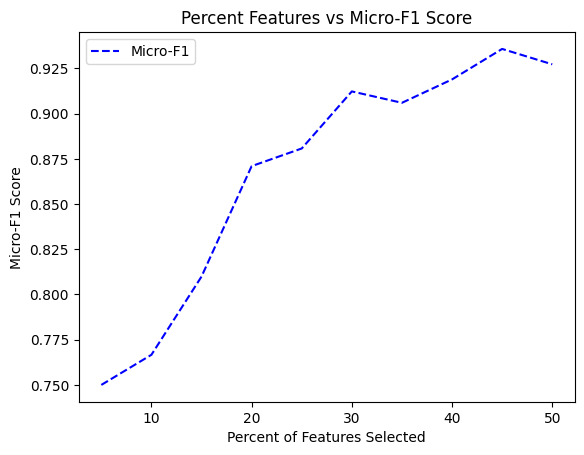

Best Features Selected by ACO: [17, 10, 15, 4, 5, 11, 10, 12, 19]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Define decay coefficient globally
decay_coefficient = 0.5

def evaluate_ant_solution(X, selected_features, y):
    clf = SVC()
    X_subset = X[:, selected_features]
    clf.fit(X_subset, y)
    y_pred = clf.predict(X_subset)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    return precision, recall, f1

def classifier_evaluation(X, y, classifier, selected_features):
    X_subset = X[:, selected_features]
    classifier.fit(X_subset, y)
    y_pred = classifier.predict(X_subset)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    return precision, recall, f1

def aco_feature_selection(X, k, y, num_ants=10, max_iterations=100):
    pheromone_levels = np.ones(X.shape[1])
    classifier_weight = 0.8
    length_weight = 0.2
    best_solution = {'features': [], 'performance': 0.0}

    for iteration in range(max_iterations):
        ant_solutions = []

        for ant in range(num_ants):
            ant_path = []

            for step in range(k):
                feature_probabilities = calculate_feature_probabilities(pheromone_levels)
                selected_feature = np.random.choice(X.shape[1], p=feature_probabilities)
                ant_path.append(selected_feature)

            ant_solutions.append(ant_path)

        for ant_path in ant_solutions:
            precision, recall, f1 = evaluate_ant_solution(X, ant_path, y)

            if f1 > best_solution['performance']:
                best_solution['features'] = ant_path
                best_solution['performance'] = f1

        pheromone_levels = update_pheromone_levels(pheromone_levels, ant_solutions, classifier_weight, length_weight)

    return best_solution['features']

def calculate_feature_probabilities(pheromone_levels):
    total_pheromone = np.sum(pheromone_levels)
    feature_probabilities = pheromone_levels / total_pheromone
    return feature_probabilities

def update_pheromone_levels(pheromone_levels, ant_solutions, classifier_weight, length_weight):
    evaporation = (1 - decay_coefficient) * pheromone_levels
    pheromone_increment = np.zeros_like(pheromone_levels)

    for ant_path in ant_solutions:
        precision, recall, f1 = evaluate_ant_solution(X, ant_path, y)
        feature_subset_length = len(set(ant_path))

        pheromone_increment[ant_path] += classifier_weight * f1
        pheromone_increment[ant_path] += length_weight / feature_subset_length

    updated_pheromone_levels = evaporation + pheromone_increment
    return updated_pheromone_levels

# Example usage:
# Assuming you have X (feature matrix) and y (target variable) defined
# Let's create some dummy data for illustration purposes
X = np.random.rand(100, 20)  # Replace with your actual feature matrix
y = np.random.randint(2, size=100)  # Replace with your actual target variable

num_features_to_select = 10
aco_best_features = None
aco_best_f1 = 0.0

percent_features = []
micro_f1_scores = []

for k in range(1, num_features_to_select + 1):
    # ACO-based feature selection
    selected_features = aco_feature_selection(X, k, y)

    # Evaluate performance
    precision_aco, recall_aco, f1_aco = classifier_evaluation(X, y, SVC(), selected_features)

    # Update ACO best features if better
    if f1_aco > aco_best_f1:
        aco_best_f1 = f1_aco
        aco_best_features = selected_features

    percent_features.append(k / X.shape[1] * 100)
    micro_f1_scores.append(f1_aco)

# Visualize the results
plt.plot(percent_features, micro_f1_scores, label='Micro-F1', linestyle='--', color='blue')
plt.title('Percent Features vs Micro-F1 Score')
plt.xlabel('Percent of Features Selected')
plt.ylabel('Micro-F1 Score')
plt.legend()
plt.show()

# Display the best features selected by ACO
print("Best Features Selected by ACO:", aco_best_features)


In [ ]:
def calculate_f1_score(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return f1

def calculate_precision_recall(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return precision, recall

# Example usage:
# Assuming you have y_true (true labels) and y_pred (predicted labels) defined
# Let's create some dummy data for illustration purposes
y_true = np.random.randint(2, size=100)
y_pred = np.random.randint(2, size=100)

# Calculate F1 score
f1_score = calculate_f1_score(y_true, y_pred)
print("F1 Score:", f1_score)

# Calculate precision and recall
precision, recall = calculate_precision_recall(y_true, y_pred)
print("Precision:", precision)
print("Recall:", recall)


F1 Score: 0.5154639175257733
Precision: 0.5102040816326531
Recall: 0.5208333333333334


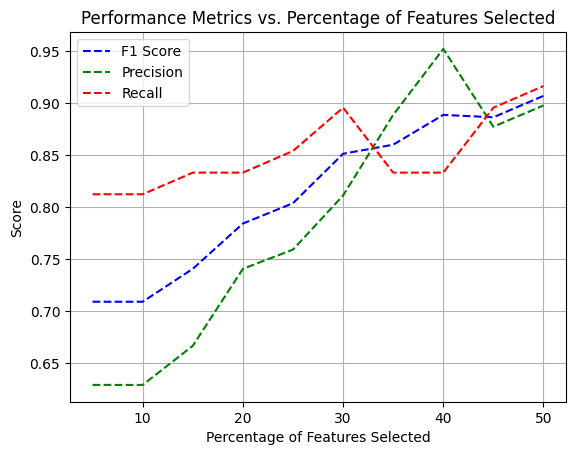

Best Features Selected by ACO: [6, 11, 1, 17, 14, 3, 13, 16, 0, 11]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Define decay coefficient globally
decay_coefficient = 0.5

def evaluate_ant_solution(X, selected_features, y):
    clf = SVC()
    X_subset = X[:, selected_features]
    clf.fit(X_subset, y)
    y_pred = clf.predict(X_subset)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    return precision, recall, f1

def classifier_evaluation(X, y, classifier, selected_features):
    X_subset = X[:, selected_features]
    classifier.fit(X_subset, y)
    y_pred = classifier.predict(X_subset)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='binary')
    return precision, recall, f1

def aco_feature_selection(X, k, y, num_ants=10, max_iterations=100):
    pheromone_levels = np.ones(X.shape[1])
    classifier_weight = 0.8
    length_weight = 0.2
    best_solution = {'features': [], 'performance': 0.0}

    for iteration in range(max_iterations):
        ant_solutions = []

        for ant in range(num_ants):
            ant_path = []

            for step in range(k):
                feature_probabilities = calculate_feature_probabilities(pheromone_levels)
                selected_feature = np.random.choice(X.shape[1], p=feature_probabilities)
                ant_path.append(selected_feature)

            ant_solutions.append(ant_path)

        for ant_path in ant_solutions:
            precision, recall, f1 = evaluate_ant_solution(X, ant_path, y)

            if f1 > best_solution['performance']:
                best_solution['features'] = ant_path
                best_solution['performance'] = f1

        pheromone_levels = update_pheromone_levels(pheromone_levels, ant_solutions, classifier_weight, length_weight)

    return best_solution['features']

def calculate_feature_probabilities(pheromone_levels):
    total_pheromone = np.sum(pheromone_levels)
    feature_probabilities = pheromone_levels / total_pheromone
    return feature_probabilities

def update_pheromone_levels(pheromone_levels, ant_solutions, classifier_weight, length_weight):
    evaporation = (1 - decay_coefficient) * pheromone_levels
    pheromone_increment = np.zeros_like(pheromone_levels)

    for ant_path in ant_solutions:
        precision, recall, f1 = evaluate_ant_solution(X, ant_path, y)
        feature_subset_length = len(set(ant_path))

        pheromone_increment[ant_path] += classifier_weight * f1
        pheromone_increment[ant_path] += length_weight / feature_subset_length

    updated_pheromone_levels = evaporation + pheromone_increment
    return updated_pheromone_levels

# Calculate F1 score
def calculate_f1_score(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return f1

# Calculate precision and recall
def calculate_precision_recall(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return precision, recall

# Example usage:
# Assuming you have X (feature matrix) and y (target variable) defined
# Let's create some dummy data for illustration purposes
X = np.random.rand(100, 20)  # Replace with your actual feature matrix
y = np.random.randint(2, size=100)  # Replace with your actual target variable

num_features_to_select = 10
aco_best_features = None
aco_best_f1 = 0.0

percent_features = []
f1_scores = []
precision_scores = []
recall_scores = []

for k in range(1, num_features_to_select + 1):
    # ACO-based feature selection
    selected_features = aco_feature_selection(X, k, y)

    # Evaluate performance
    precision_aco, recall_aco, f1_aco = classifier_evaluation(X, y, SVC(), selected_features)

    # Update ACO best features if better
    if f1_aco > aco_best_f1:
        aco_best_f1 = f1_aco
        aco_best_features = selected_features

    percent_features.append(k / X.shape[1] * 100)
    f1_scores.append(f1_aco)

    # Create a subset of X with the selected features
    X_subset = X[:, selected_features]

    # Train a classifier on the subset of features
    clf = SVC()
    clf.fit(X_subset, y)

    # Predict labels using the trained classifier
    y_pred = clf.predict(X_subset)

    # Calculate precision and recall for the selected features
    precision, recall = calculate_precision_recall(y, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Visualize the results
plt.plot(percent_features, f1_scores, label='F1 Score', linestyle='--', color='blue')
plt.plot(percent_features, precision_scores, label='Precision', linestyle='--', color='green')
plt.plot(percent_features, recall_scores, label='Recall', linestyle='--', color='red')
plt.xlabel('Percentage of Features Selected')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Percentage of Features Selected')
plt.legend()
plt.grid(True)
plt.show()

# Display the best features selected by ACO
print("Best Features Selected by ACO:", aco_best_features)


In [4]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import requests
from bs4 import BeautifulSoup
import re

# Load the dataset containing web documents and URLs
def load_web_data(path):
    documents = []
    urls = []
    for root, _, files in os.walk(path):
        for file in files:
            with open(os.path.join(root, file), "r", encoding="ISO-8859-1") as f:
                documents.append(f.read())
                urls.append(get_url_from_filename(file))  # Assuming the filename contains the URL

    return documents, urls


# Extract URL from filename
def get_url_from_filename(filename):
    # Assuming filename follows a specific format, e.g., "url_website.com.txt"
    return filename.split("_", 1)[1].replace(".txt", "")

# Function to extract text content from a webpage given its URL
def extract_text_from_webpage(url):
    # Send a GET request to the URL
    response = requests.get(url)
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")
    # Extract text from HTML
    text = soup.get_text()
    # Remove extra white spaces and newlines
    text = re.sub(r'\s+', ' ', text)
    return text

# Function to search documents based on user query
def search_documents(query, documents, urls):
    relevant_documents = []
    for document, url in zip(documents, urls):
        if query.lower() in document.lower():
            relevant_documents.append((document, url))
    return relevant_documents

# Example ACO algorithm for feature selection
def feature_selection_ACO(X_train, X_test, y_train, y_test, n_ants, n_iterations, pheromones, heuristic_info, update_pheromones):
    best_scores = []
    best_paths = []
    for iteration in range(n_iterations):
        paths = []
        scores = []
        for ant in range(n_ants):
            features_probability = (pheromones ** alpha) * (heuristic_info ** beta)
            features_probability /= features_probability.sum()
            chosen_features = np.random.choice([0, 1], size=n_features, p=features_probability)
            paths.append(chosen_features)

            clf = RandomForestClassifier(n_estimators=50)
            clf.fit(X_train[:, chosen_features.astype(bool)], y_train)
            score = clf.score(X_test[:, chosen_features.astype(bool)], y_test)
            scores.append(score)

        update_pheromones(pheromones, paths, scores)
        best_score_idx = np.argmax(scores)
        best_score = scores[best_score_idx]
        best_scores.append(best_score)
        best_paths.append(paths[best_score_idx])
        print(f"Iteration {iteration}, Best Score: {best_score}")

    return best_scores, best_paths

# User query
user_query = input("Enter your query: ")

# Load the dataset containing web documents and URLs
documents, urls = load_web_data("/content/drive/MyDrive/Major_Project/Project_code/webkb-data/webkb/course")

# Search for documents containing the user query
relevant_documents = search_documents(user_query, documents, urls)

# Display relevant documents
for document, url in relevant_documents:
    print(f"URL: {url}")


# You need to modify the following part to prepare your data for ACO feature selection
# Assuming you have prepared your data (X_train, X_test, y_train, y_test) and initialized other parameters
# Then, call the ACO feature selection function
# best_scores, best_paths = feature_selection_ACO(X_train, X_test, y_train, y_test, n_ants, n_iterations, pheromones, heuristic_info, update_pheromones)


Enter your query: CSI
URL: ^^www.CS.Princeton.EDU^courses^archive^spr96^cs425^
URL: ^^www.cs.ucsb.edu^~teo^cs130a.html
URL: ^^www.cs.hmc.edu^~keller^cs152f96.html
URL: ^^www.eecs.umich.edu^courses^eecs270^
